#Домашняя работа № 1. Временные ряды, общая теория

##Загрузим данные

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-13 16:35:45--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip.1’

1._Лекция_tsml.zip. 100%[===================>] 751.03K   832KB/s    in 0.9s    

2025-02-13 16:35:47 (832 KB/s) - ‘1._Лекция_tsml.zip.1’ saved [769056/769056]



In [3]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

In [4]:
# прочитаем
# 1. ежемесячные распродажи_компании_x_jan_6
monthly_sales_of_company_x_jan_6 = pd.read_csv('/content/unpacked_files/Series/monthly-sales-of-company-x-jan-6.csv')
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')
# 3. международные авиалинии_пассажиров
international_airline_passengers = pd.read_csv('/content/unpacked_files/Series/international-airline-passengers.csv')
# 4. средняя_месячная_воздушная_температура_дег
mean_monthly_air_temperature_deg = pd.read_csv('/content/unpacked_files/Series/mean-monthly-air-temperature-deg.csv')
# 5. еженедельные публикации о Доу-Джонсе_
weekly_closings_of_the_dowjones_ = pd.read_csv('/content/unpacked_files/Series/weekly-closings-of-the-dowjones-.csv')
# 6. ежедневные_общественные_ женские_рождения в_калифорнии
daily_total_female_births_in_cal = pd.read_csv('/content/unpacked_files/Series/daily-total-female-births-in-cal.csv')

Позаимствуем функции из лекции

In [5]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

##1. monthly_sales_of_company_x_jan_6

In [7]:
series_1 = monthly_sales_of_company_x_jan_6['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


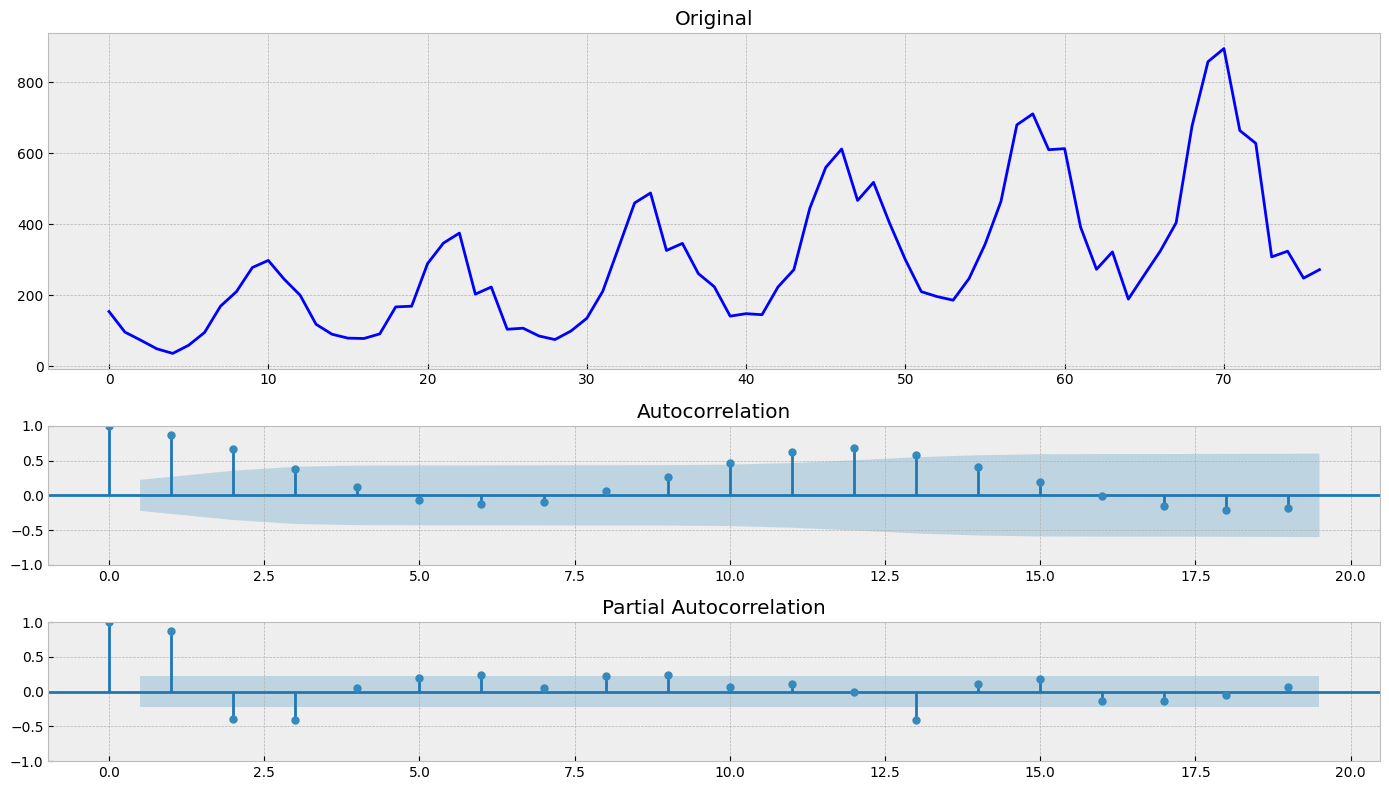

In [8]:
# посмотрим первоначальный вариант
tsplot(series_1)

1. Детерминирование тренда (detrending)

In [9]:
# напишем функцию
def de_trend(series, window=12):

    # вычислим скользящее среднее
    rolling_mean = series.rolling(window=window).mean()

    # детерминируем тренд
    detrended = series - rolling_mean

    plt.figure(figsize=(14, 7))
    plt.plot(series, label='Исходный ряд')
    plt.plot(rolling_mean, label='Скользящее среднее', color='red')
    plt.plot(detrended, label='Detrended', color='green')
    plt.title('Детерминированный тренд')
    plt.xlabel('Время')
    plt.ylabel('Величина')
    plt.grid(False)
    plt.legend()
    plt.show()

    return detrended.dropna()

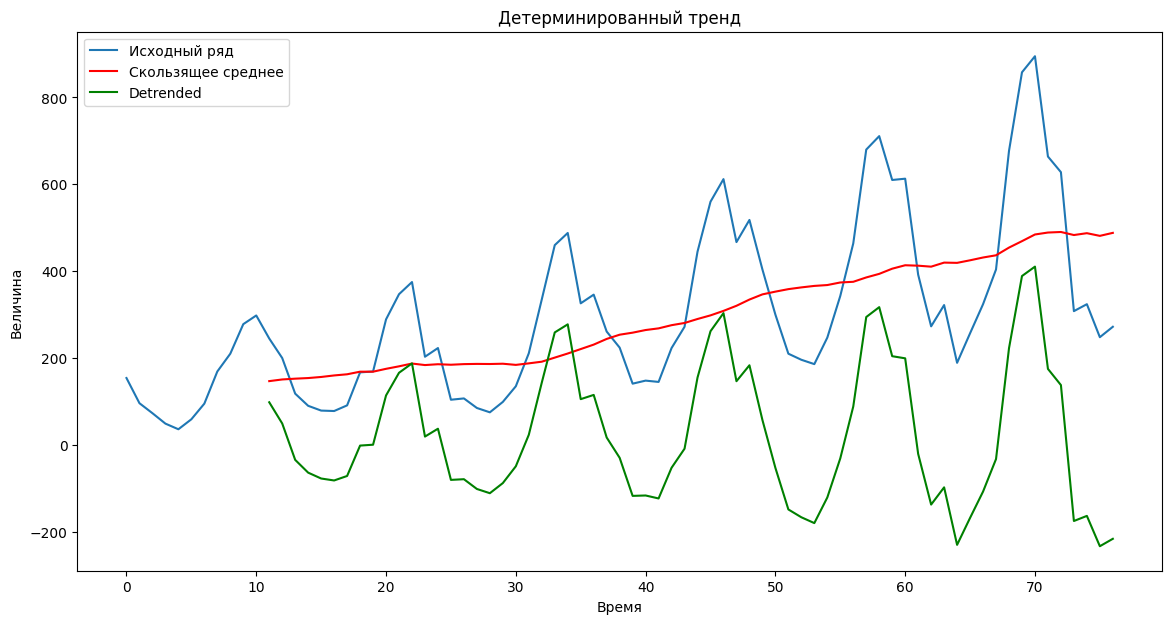

In [10]:
# установим размер окна
# (70-0)/6
window = 12
detrended = de_trend(series_1, window)

Results of Dickey-Fuller Test:
Test Statistic                 -1.158352
p-value                         0.691250
#Lags Used                     11.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


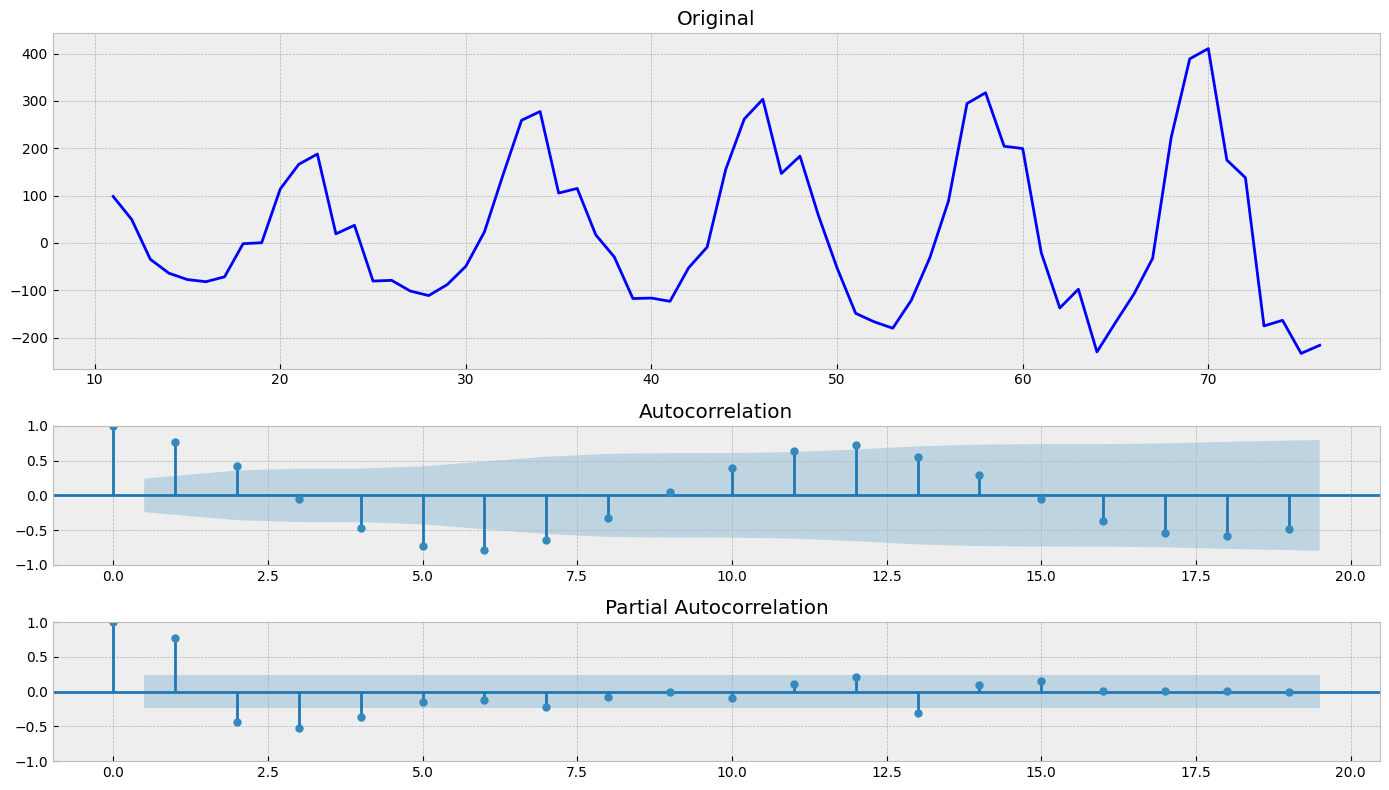

In [11]:
# посмотрим результат
tsplot(detrended)

2. Применим дифференцирование к детерминированному ряду

In [12]:
# напишем функцию
def deferentiation(data):
    differenced = data.dropna().diff().dropna()

    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Детерминированный ряд', color='green')
    plt.plot(differenced, label=' Дифференцированный ряд', color='red')
    plt.title('Дифференцирование')
    plt.grid(False)
    plt.legend()
    plt.show()

    return differenced

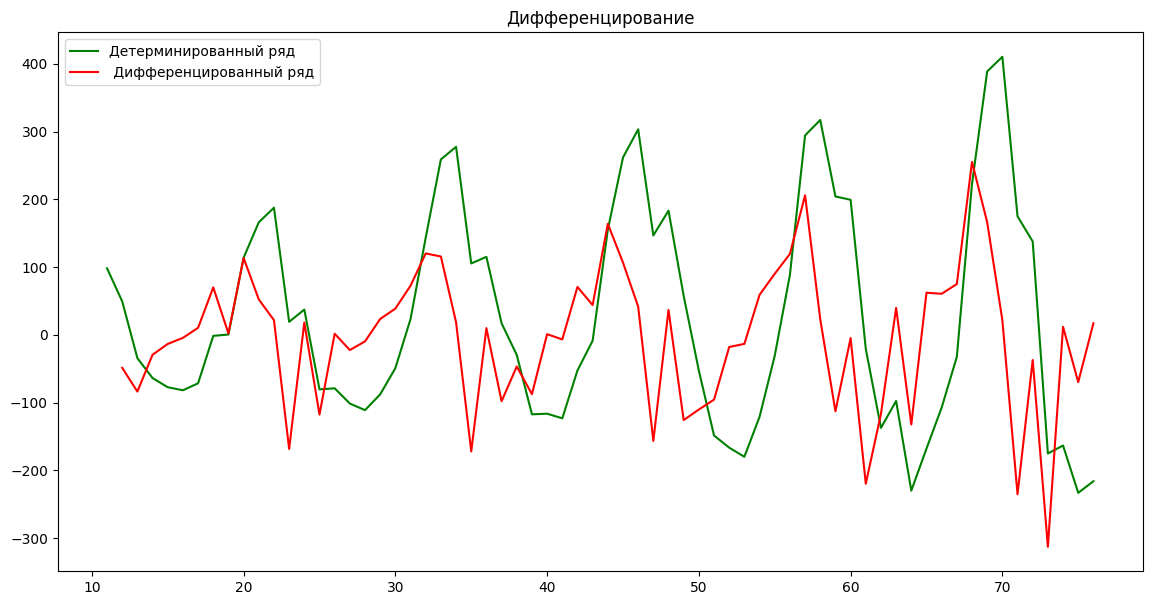

In [13]:
differenced = deferentiation(detrended)

Results of Dickey-Fuller Test:
Test Statistic                 -3.677674
p-value                         0.004438
#Lags Used                     11.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


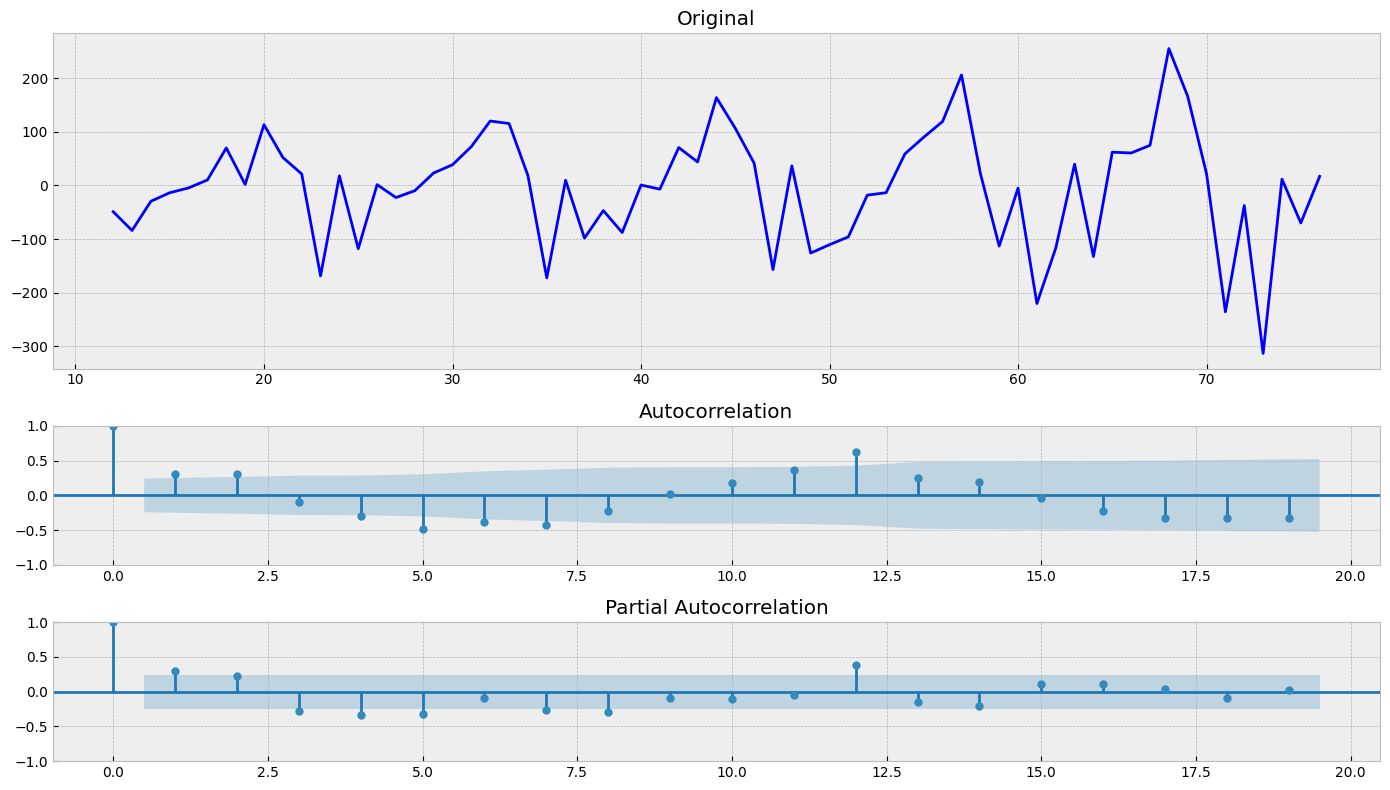

In [14]:
# посмотрим результат
tsplot(differenced)

##2. monthly_boston_armed_robberies_j

In [15]:
series_2 = monthly_boston_armed_robberies_j['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


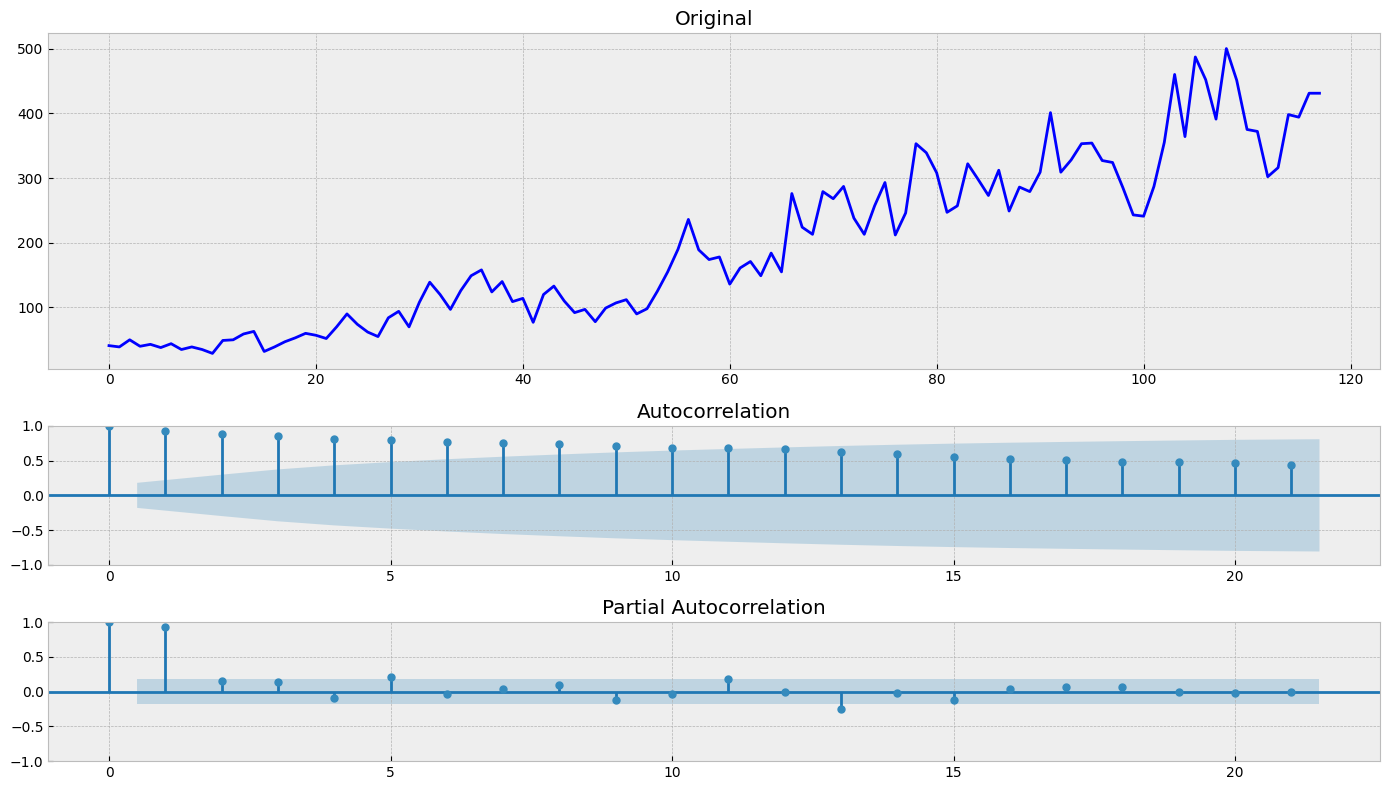

In [16]:
# посмотрим первоначальный вариант
tsplot(series_2)

1. Детерминирование тренда (detrending)

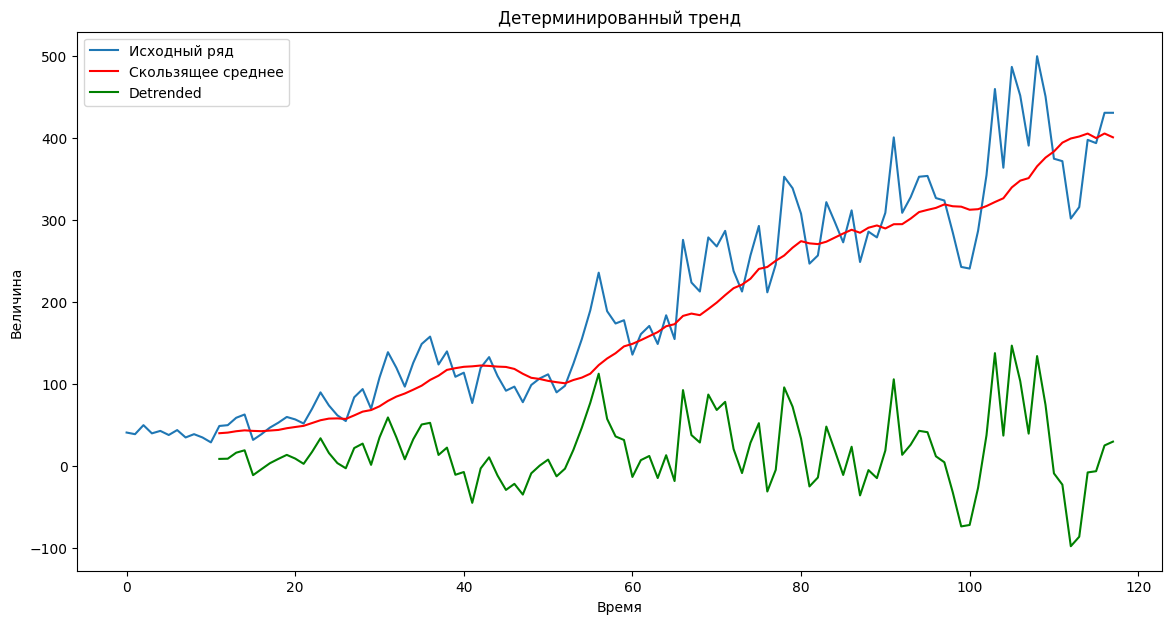

In [17]:
# установим размер окна
# так речь идет про месяца то размер окна приму 12
window = 12
detrended = de_trend(series_2, window)

Results of Dickey-Fuller Test:
Test Statistic                 -2.247207
p-value                         0.189560
#Lags Used                     11.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


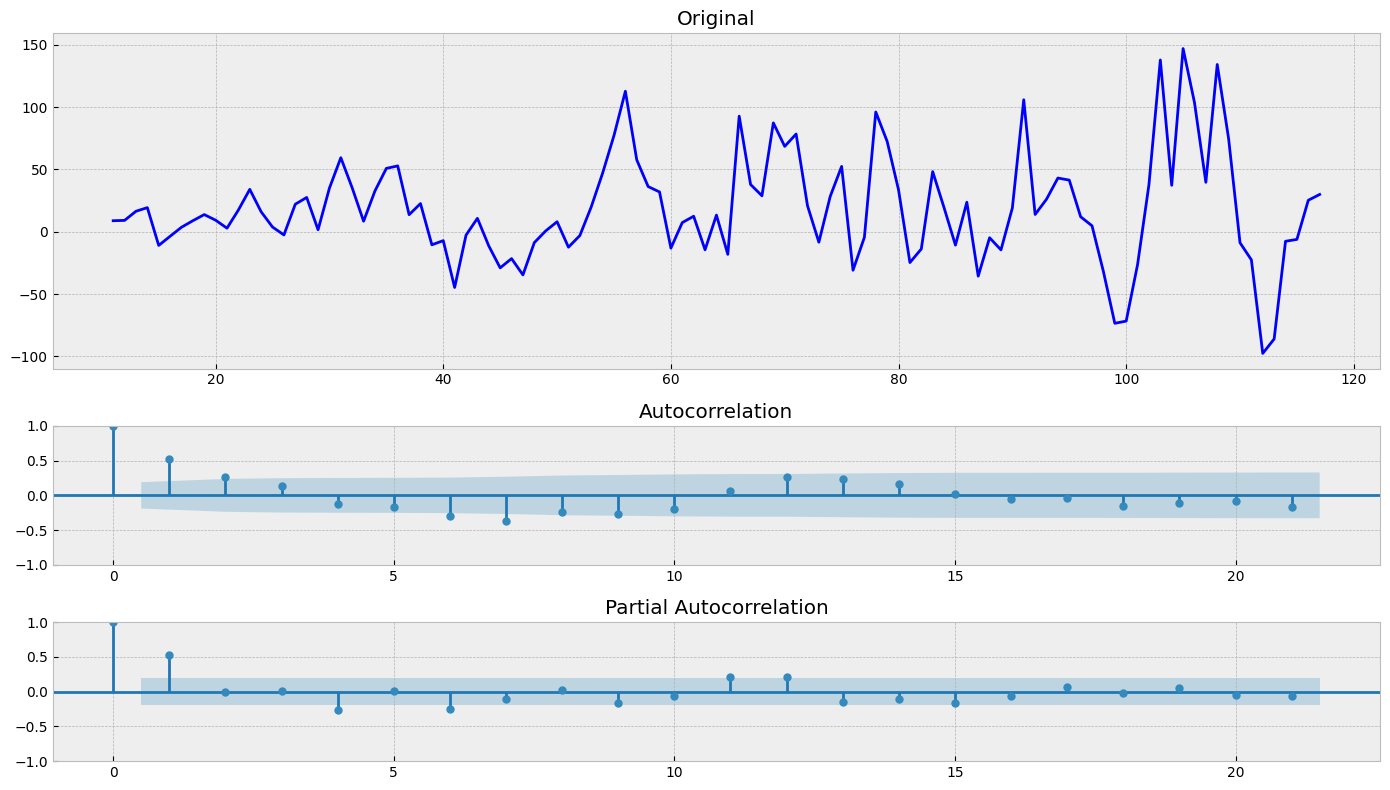

In [18]:
# посмотрим результат
tsplot(detrended)

2. Применим дифференцирование к детерминированному ряду

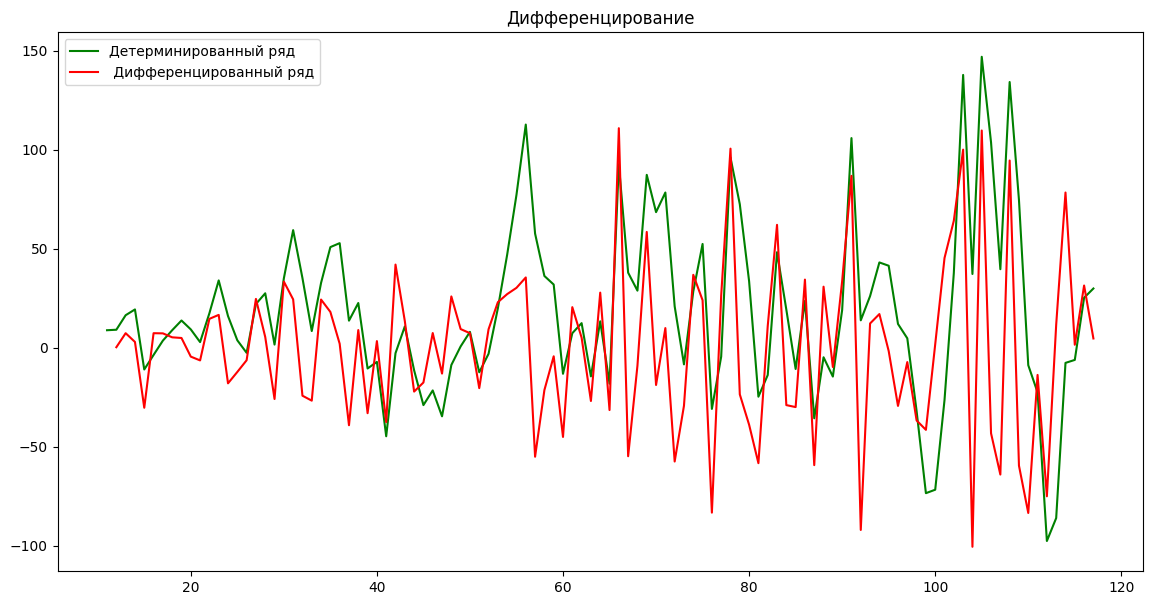

In [19]:
differenced = deferentiation(detrended)

Results of Dickey-Fuller Test:
Test Statistic                -7.780023e+00
p-value                        8.466012e-12
#Lags Used                     1.000000e+01
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


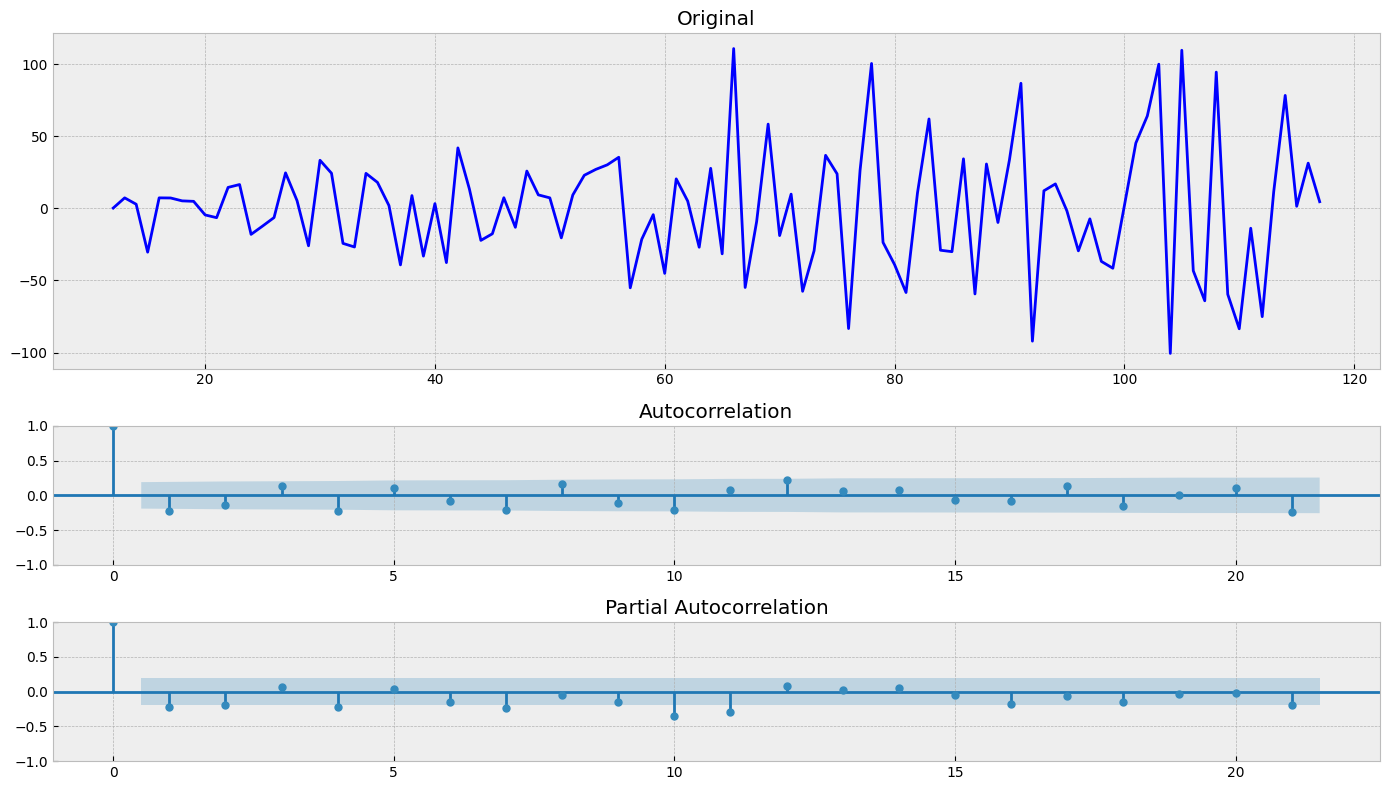

In [20]:
# посмотрим результат
tsplot(differenced)

##3. international_airline_passengers

In [23]:
series_3 = international_airline_passengers['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


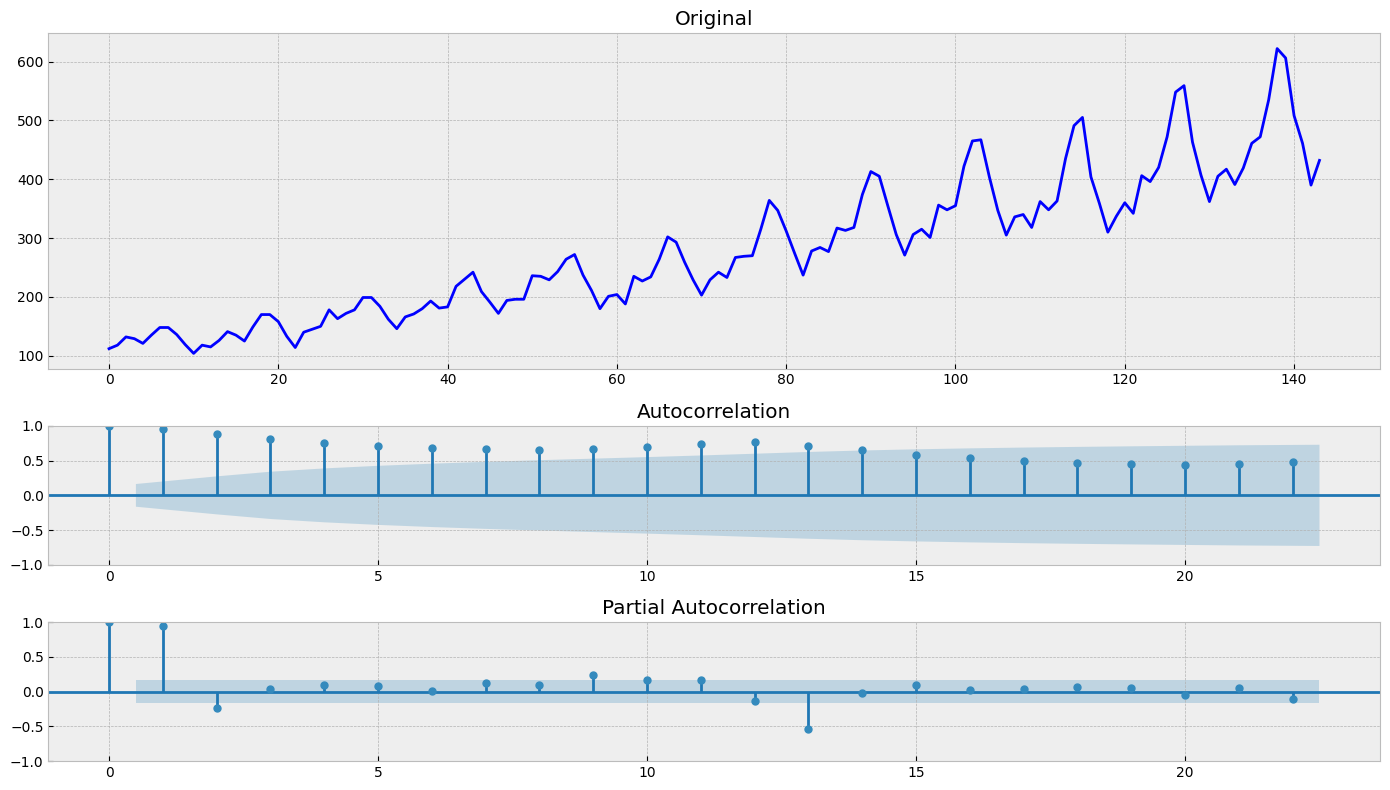

In [26]:
# посмотрим первоначальный вариант
tsplot(series_3)

1. Детерминирование тренда (detrending)

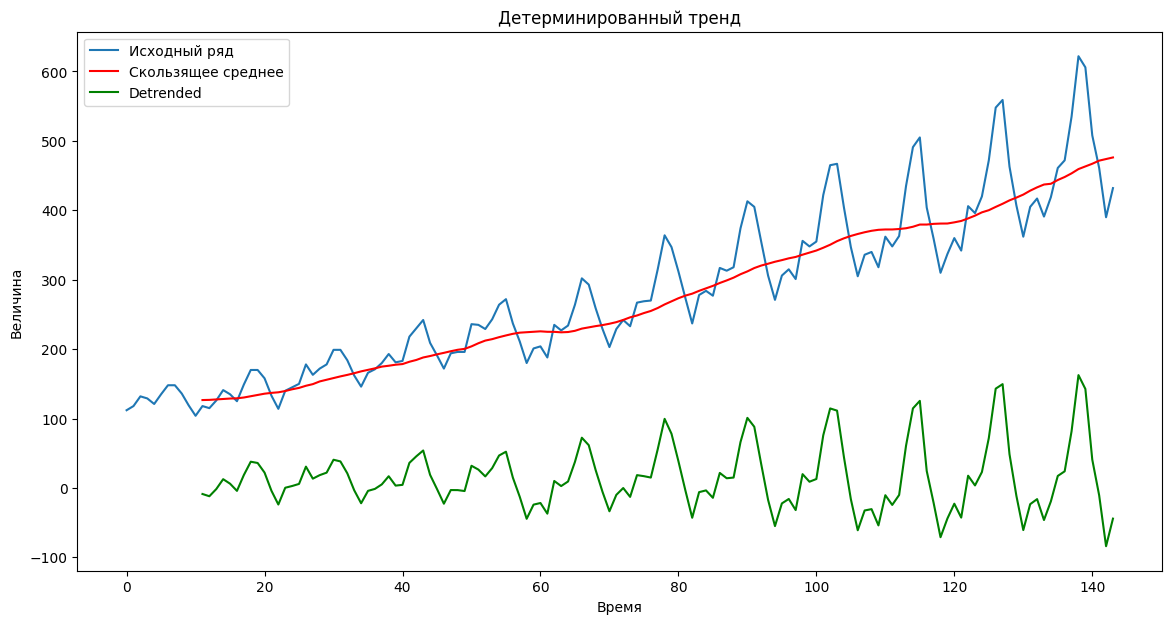

In [29]:
# установим размер окна
# так речь идет про месяца то размер окна приму 12
window = 12
detrended = de_trend(series_3, window)

Results of Dickey-Fuller Test:
Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


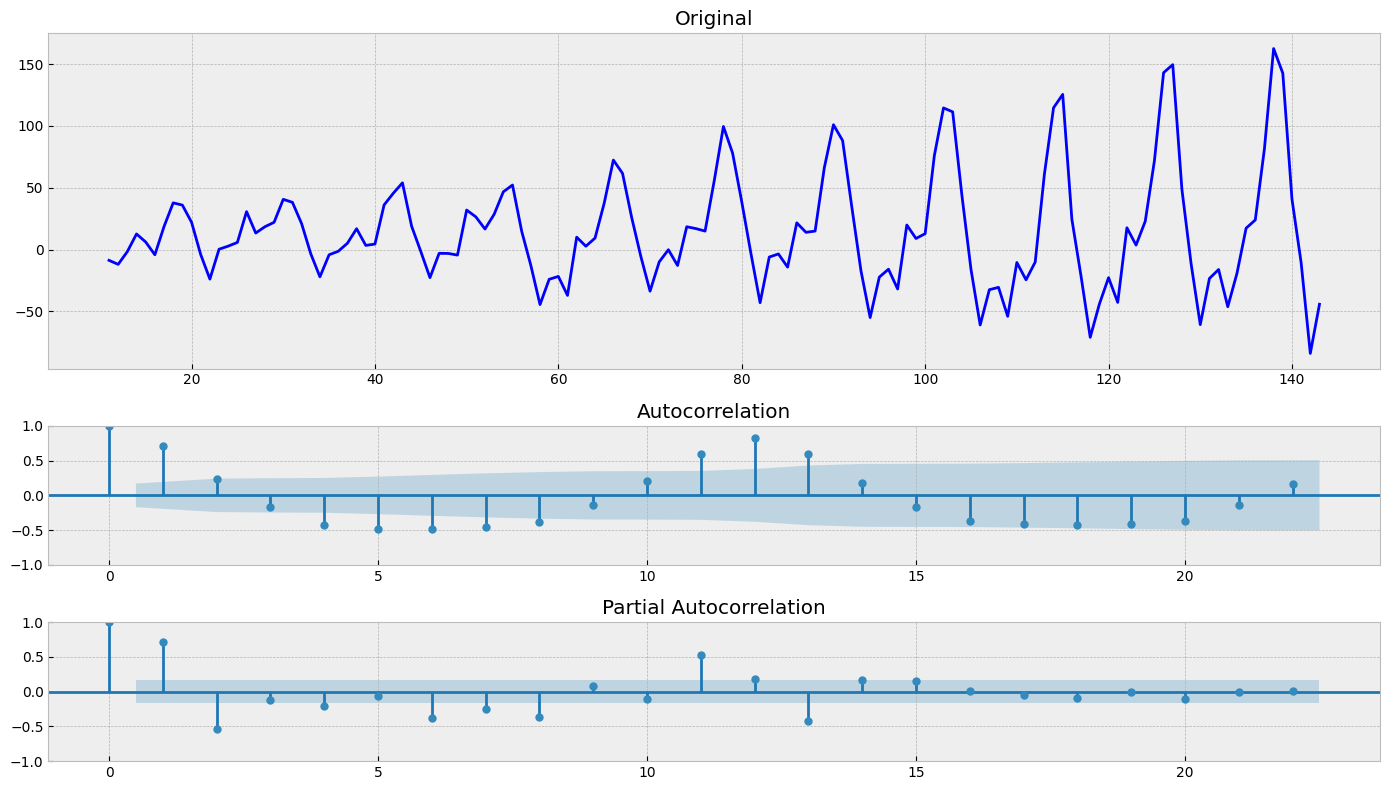

In [30]:
# посмотрим результат
tsplot(detrended)

##4. mean_monthly_air_temperature_deg

In [35]:
series_4 = mean_monthly_air_temperature_deg['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


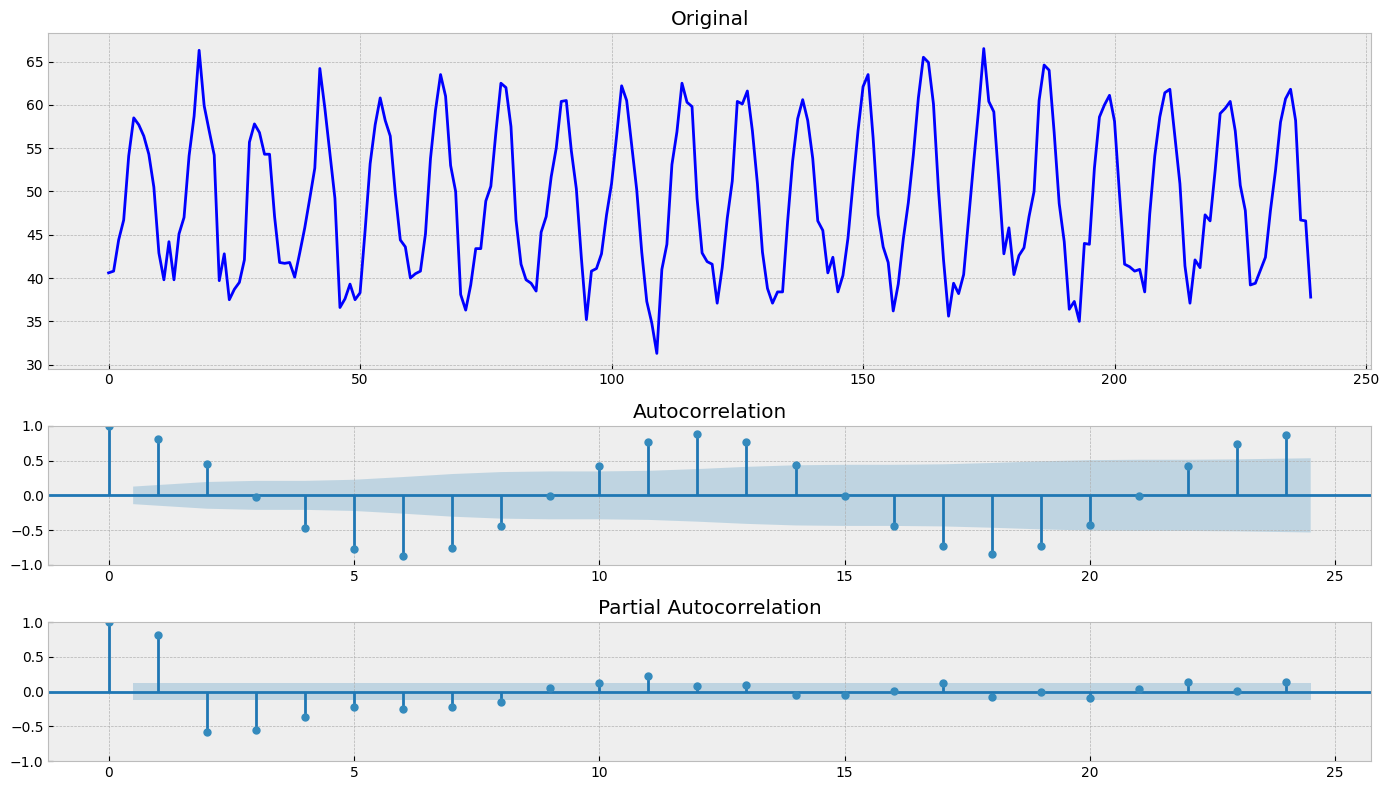

In [37]:
# посмотрим первоначальный вариант
tsplot(series_4)

Не знаю на сколько я прав, но p-value уже меньше 0.05. Считаю, что тут и так все хорошо

##5. weekly_closings_of_the_dowjones_

In [40]:
series_5 = weekly_closings_of_the_dowjones_['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


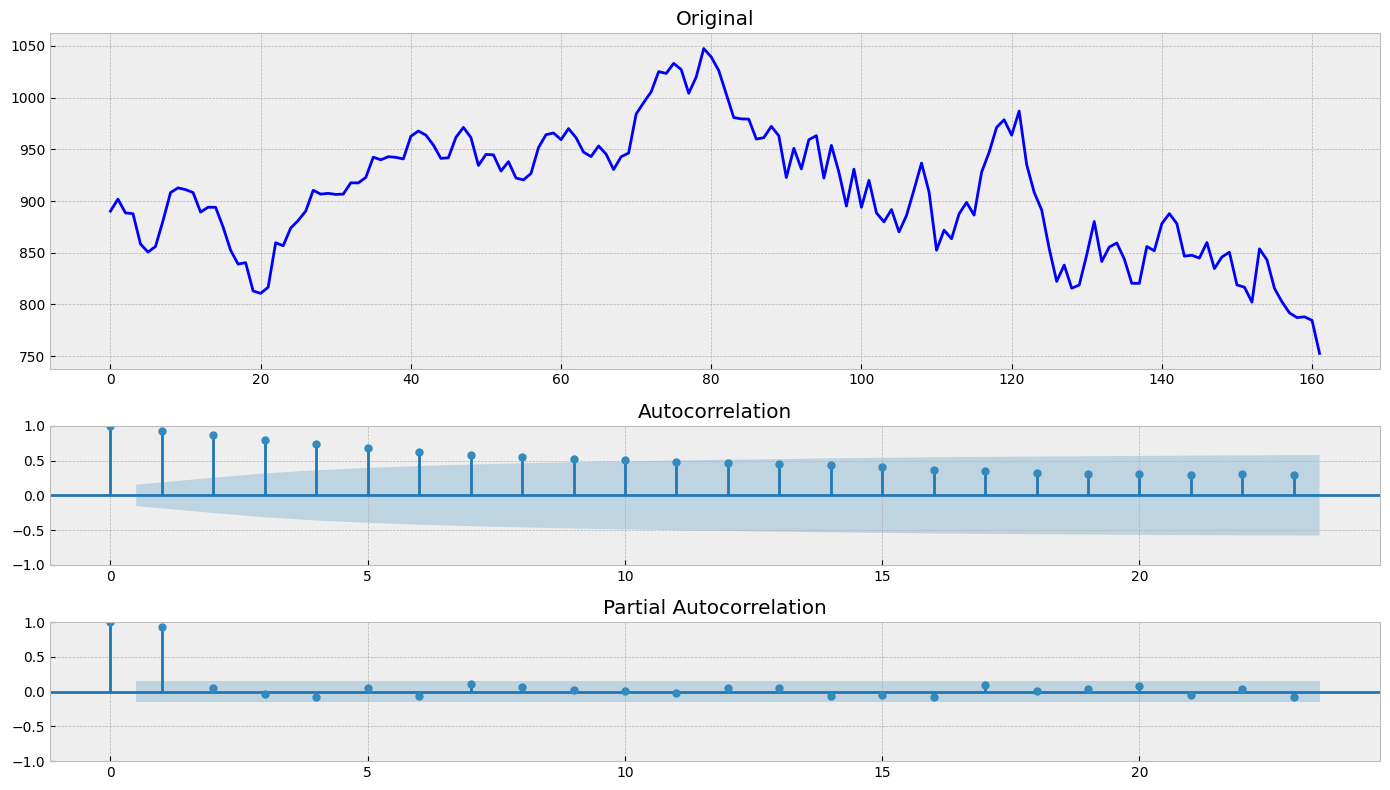

In [42]:
# посмотрим первоначальный вариант
tsplot(series_5)

1. Детерминирование тренда (detrending)

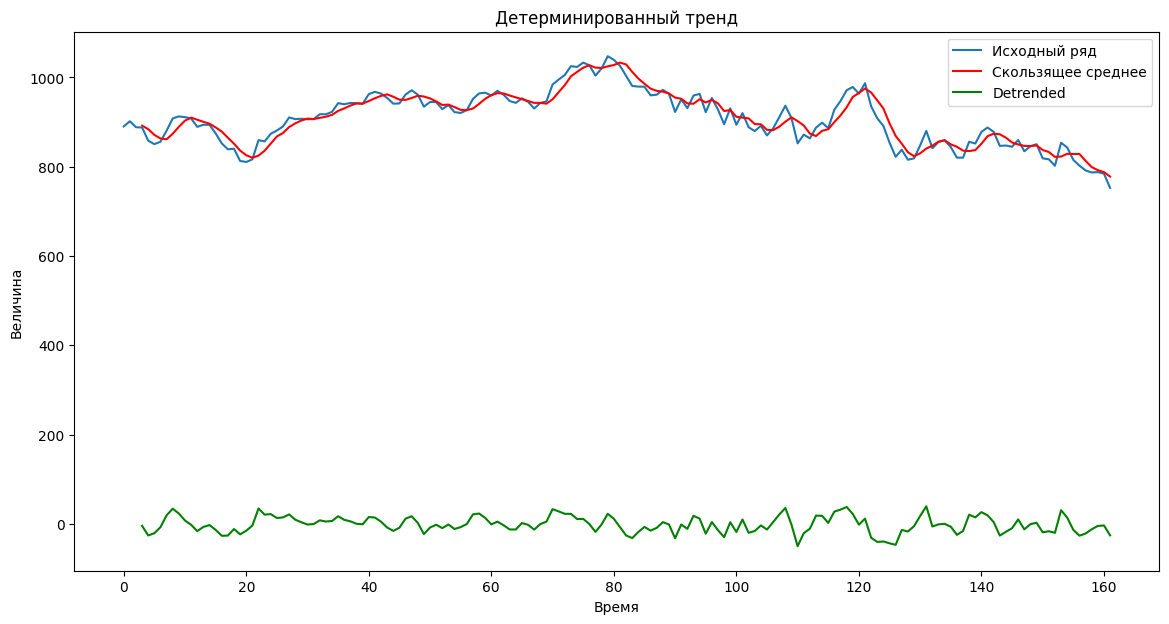

In [47]:
# установим размер окна
# размер окна приму 4 (примерно столько недель в месяце)
window = 4
detrended = de_trend(series_5, window)

Results of Dickey-Fuller Test:
Test Statistic                -6.761085e+00
p-value                        2.791155e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)           -2.880132e+00
Critical Value (10%)          -2.576683e+00
dtype: float64


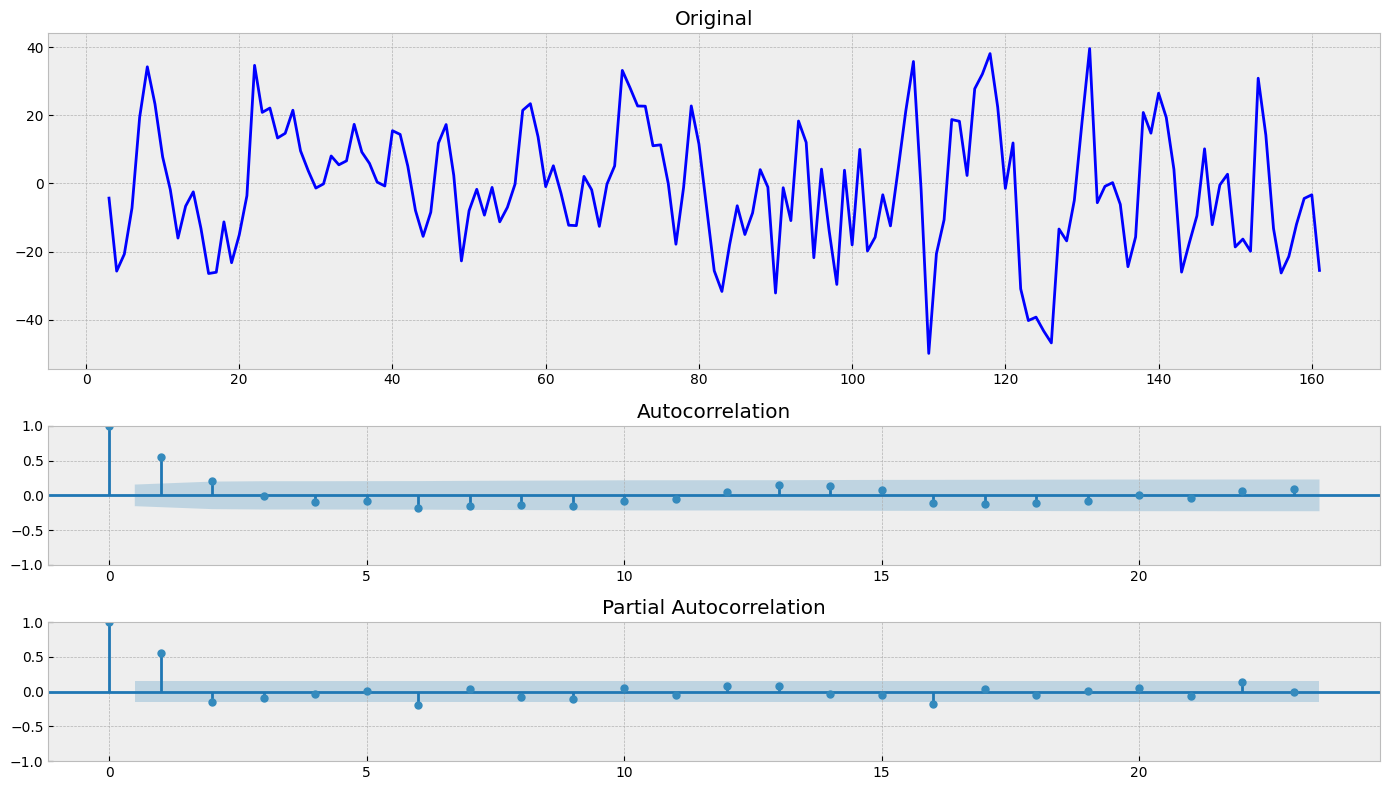

In [48]:
# посмотрим результат
tsplot(detrended)

##6. daily_total_female_births_in_cal

In [54]:
series_6 = daily_total_female_births_in_cal['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


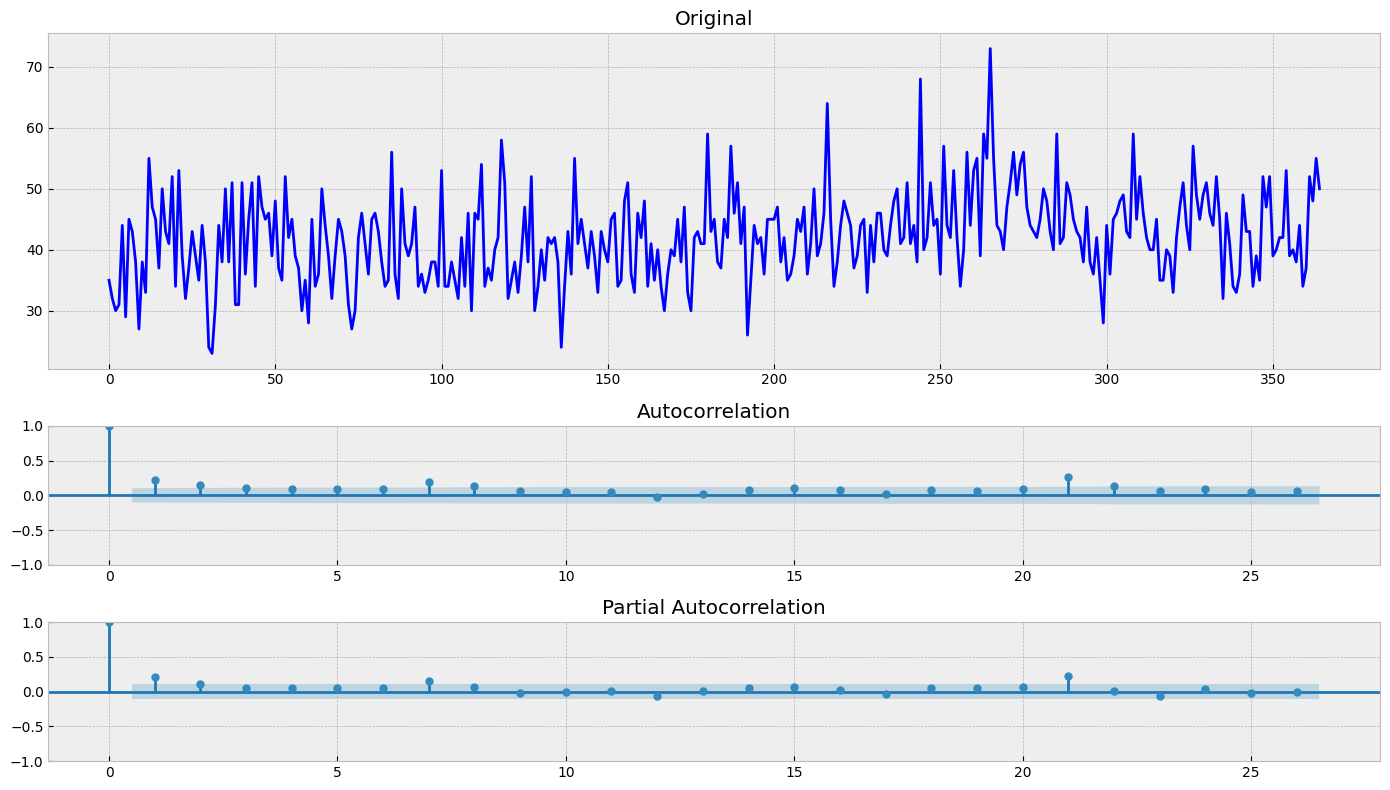

In [55]:
# посмотрим первоначальный вариант
tsplot(series_6)

Посмотрим можно ли сделать лучше

1. Детерминирование тренда (detrending)

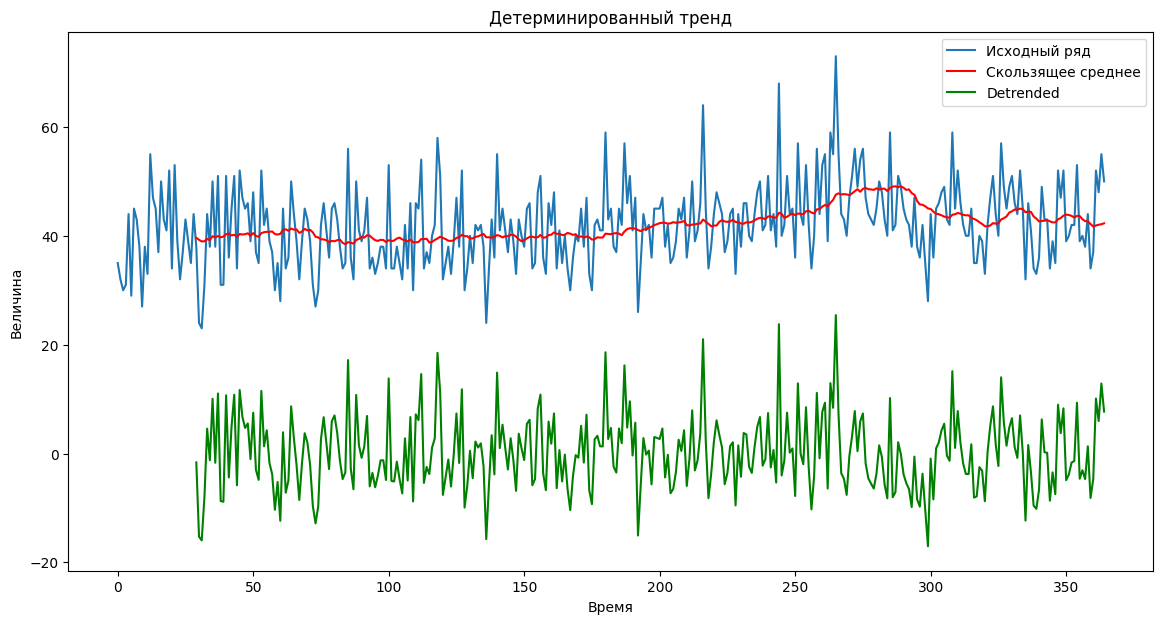

In [61]:
# установим размер окна
# так речь идет про месяца то размер окна приму 12
window = 30
detrended = de_trend(series_6, window)

Results of Dickey-Fuller Test:
Test Statistic                -1.579401e+01
p-value                        1.093681e-28
#Lags Used                     0.000000e+00
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


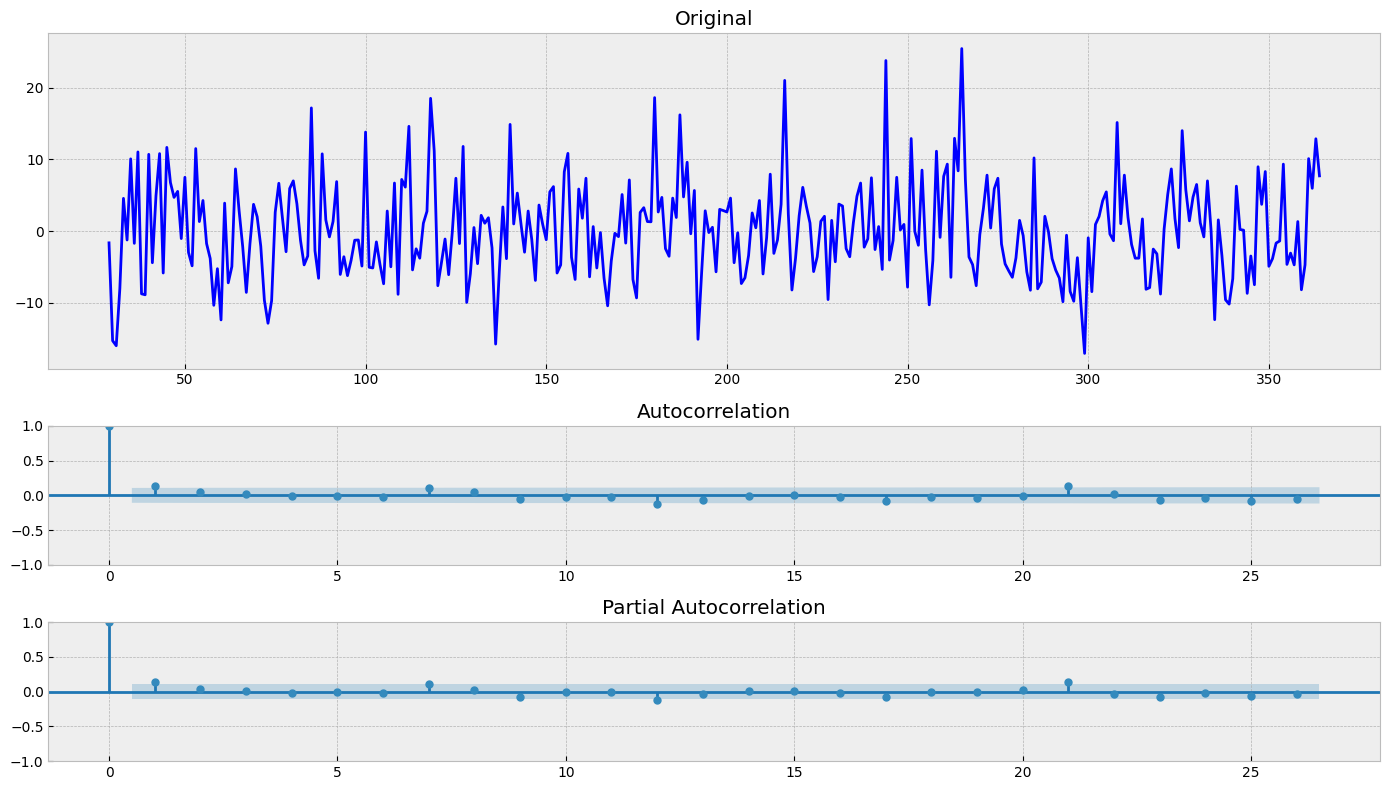

In [62]:
# посмотрим результат
tsplot(detrended)